In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn import datasets


In [73]:
dl = pd.read_csv("temp.csv")
data = dl.drop(['Unnamed: 0', 'name', 'torque', 'seats','max_power'], axis=1).copy()
data

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298
...,...,...,...,...,...,...,...,...,...
8123,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197
8124,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493
8125,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.30,1248
8126,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396


In [74]:
data.isnull().sum()

year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
dtype: int64

      year  selling_price  km_driven  mileage  engine  fuel_Diesel  fuel_LPG  \
0     2014         450000     145500    23.40    1248            1         0   
1     2014         370000     120000    21.14    1498            1         0   
2     2006         158000     140000    17.70    1497            0         0   
3     2010         225000     127000    23.00    1396            1         0   
4     2007         130000     120000    16.10    1298            0         0   
...    ...            ...        ...      ...     ...          ...       ...   
8123  2013         320000     110000    18.50    1197            0         0   
8124  2007         135000     119000    16.80    1493            1         0   
8125  2009         382000     120000    19.30    1248            1         0   
8126  2013         290000      25000    23.57    1396            1         0   
8127  2013         290000      25000    23.57    1396            1         0   

      fuel_Petrol  seller_type_Individu

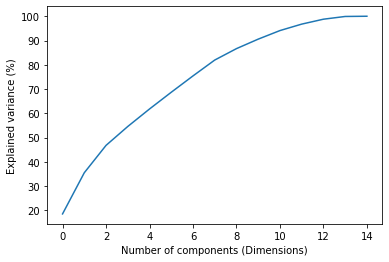

*************

 la coorelation entre chaque composante principale et les variable de départ [[ 0.28965556  0.48528637 -0.08638594 -0.10934733  0.4198776   0.32612436
  -0.0505712  -0.31506689 -0.30858288  0.09685975 -0.36755634 -0.07348684
  -0.12550905  0.05730098 -0.11206884]
 [-0.31349372 -0.12649846  0.42678466 -0.16234811  0.28116203  0.43294056
   0.02483122 -0.43612402  0.25527102 -0.20993957  0.2084577   0.08045227
   0.21072582 -0.04615979  0.11918983]] 

      principal_component_1  principal_component_2
0                 -0.093467               1.159053
1                 -0.116408               1.693410
2                 -2.200041               0.882802
3                 -0.351424               1.464633
4                 -1.794192               0.139102
...                     ...                    ...
8123              -1.385817              -0.586136
8124              -0.863988               2.514306
8125              -0.340994               1.532004
8126               0.

In [75]:
df=pd.DataFrame(data[0:])


X = df[["year","selling_price","km_driven","fuel","seller_type","transmission","owner","mileage","engine"]]
X = pd.get_dummies(data=X, drop_first=True)

print (X)
# Data scaling 
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

# PCA
pca = PCA(n_components=None)
pca.fit(X_scaled)

# Eigenvalues  sont les valeurs propres 
print("Eigenvalues:")
print(pca.explained_variance_)



features = pca.explained_variance_ratio_


#Variance c'est la quantité d'information correspondant a la valeur propres i
print("Variances :")
print(features)
print("Variances (Percentage) Accumulative:")
print(features* 100)


#visualisation de pourcentage d'information 
plt.plot(np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components (Dimensions)")
plt.ylabel("Explained variance (%)")
plt.show()

# A partir de "features" on deduire que :Les 4 premières composantes capturent ensemble une variabilité d’environ 60% dans les données.
# Nous sommes intéressés à garder les 4 premiers composants.


# Application de PCA
pca = PCA(n_components=2)
x_pca = pca.fit_transform(X_scaled)
corr = pca.components_

print("*************\n\n la coorelation entre chaque composante principale et les variable de départ",(corr),"\n")



# les features 2, 3 et 4 sont les plus importantes pour PC1. 
# De même, les features 6 puis 7 et 5 qui sont les plus importantes pour PC2.


#**************** we will delete the first variable "windy" as its has a useless impact in pc1 and pc2 *********************************


data= pd.read_csv('temp.csv',header=None)
data_after_pca = pd.DataFrame(data[1:])

# to get the remation between our items and our principla composante :
X_pca = pd.DataFrame(x_pca, columns = ['principal_component_1', 'principal_component_2'])
print(X_pca)
print("\nSize: ")
print(X_pca.shape)

In [76]:
X_pca

,principal_component_1,principal_component_2
0,-0.093467,1.159053
1,-0.116408,1.693410
2,-2.200041,0.882802
3,-0.351424,1.464633
4,-1.794192,0.139102
...,...,...
8123,-1.385817,-0.586136
8124,-0.863988,2.514306
8125,-0.340994,1.532004
8126,0.042750,0.428805


In [77]:
inert = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(X_pca)
    inert.append(kmeans.inertia_)

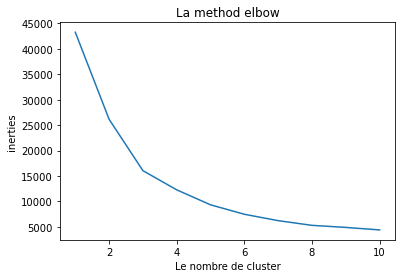

In [78]:
plt.plot(range(1, 11), inert)
plt.title('La method elbow')
plt.xlabel('Le nombre de cluster')
plt.ylabel('inerties')
plt.show()

In [79]:
model= KMeans(n_clusters=5)
model.fit(X_pca)

KMeans(n_clusters=5)

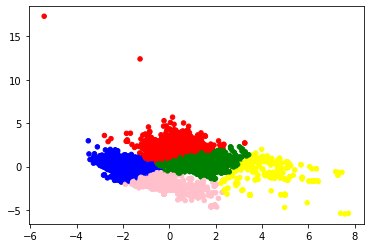

In [80]:
colorL = np.array(['green', 'red', 'blue', 'yellow', 'pink'])
plt.scatter(X_pca.principal_component_1, X_pca.principal_component_2, c=colorL[model.labels_], s=20)

In [81]:
def ClusterIndicesNumpy(clustNum, labels_array): #numpy 
    return np.where(labels_array == clustNum)[0]

def ClusterIndicesComp(clustNum, labels_array): #list comprehension
    return np.array([i for i, x in enumerate(labels_array) if x == clustNum])

In [82]:
g1 = list(ClusterIndicesNumpy(0, model.labels_))


In [83]:
g2 = list(ClusterIndicesNumpy(1, model.labels_))

In [84]:
g3 = list(ClusterIndicesNumpy(2, model.labels_))


In [85]:
g4 = list(ClusterIndicesNumpy(3, model.labels_))


In [86]:
g5 = list(ClusterIndicesNumpy(4, model.labels_))


In [87]:
# import category encoders
!pip install category_encoders
import category_encoders as ce

Defaulting to user installation because normal site-packages is not writeable


In [88]:
encoder = ce.OrdinalEncoder(cols=['fuel', 'seller_type', 'transmission','owner'])


In [89]:
data = dl.drop(['Unnamed: 0', 'name', 'torque', 'seats','max_power'], axis=1).copy()
data = encoder.fit_transform(data)
data

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine
0,2014,450000,145500,1,1,1,1,23.40,1248
1,2014,370000,120000,1,1,1,2,21.14,1498
2,2006,158000,140000,2,1,1,3,17.70,1497
3,2010,225000,127000,1,1,1,1,23.00,1396
4,2007,130000,120000,2,1,1,1,16.10,1298
...,...,...,...,...,...,...,...,...,...
8123,2013,320000,110000,2,1,1,1,18.50,1197
8124,2007,135000,119000,1,1,1,4,16.80,1493
8125,2009,382000,120000,1,1,1,1,19.30,1248
8126,2013,290000,25000,1,1,1,1,23.57,1396


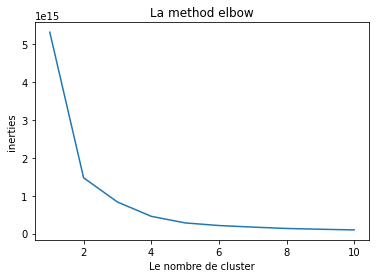

In [90]:
tab = []    
list_of_clusters = []

for i in range(1, 11):
    kmeans= KMeans(n_clusters= i) 
    kmeans.fit(data)
    tab.append(kmeans.inertia_)

    
plt.plot(range(1, 11), tab)
plt.title('La method elbow')
plt.xlabel('Le nombre de cluster')
plt.ylabel('inerties')
plt.show()   

In [91]:
kmeans= KMeans(n_clusters=4)
kmeans.fit(data)
print(kmeans)

KMeans(n_clusters=4)


In [92]:
data.corr()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine
year,1.000000,0.414092,-0.418006,-0.051355,0.234741,0.244707,-0.504905,0.315896,0.035851
selling_price,0.414092,1.000000,-0.225534,-0.202916,0.323047,0.588845,-0.221915,-0.123623,0.458345
km_driven,-0.418006,-0.225534,1.000000,-0.239728,-0.194966,-0.201229,0.282745,-0.172792,0.198911
fuel,-0.051355,-0.202916,-0.239728,1.000000,0.031641,0.010049,-0.002649,-0.028204,-0.480333
seller_type,0.234741,0.323047,-0.194966,0.031641,1.000000,0.355598,-0.200111,-0.021574,0.121836
transmission,0.244707,0.588845,-0.201229,0.010049,0.355598,1.000000,-0.141456,-0.176835,0.283986
owner,-0.504905,-0.221915,0.282745,-0.002649,-0.200111,-0.141456,1.000000,-0.172571,-0.001224
mileage,0.315896,-0.123623,-0.172792,-0.028204,-0.021574,-0.176835,-0.172571,1.000000,-0.572883
engine,0.035851,0.458345,0.198911,-0.480333,0.121836,0.283986,-0.001224,-0.572883,1.000000


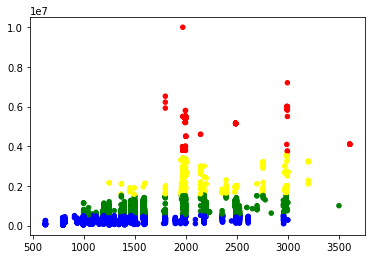

In [93]:
colorL = np.array(['green', 'red', 'blue', 'yellow'])
plt.scatter(data.engine, data.selling_price, c=colorL[kmeans.labels_], s=20)

In [94]:
kmeans.labels_

array([2, 2, 2, ..., 2, 2, 2])

In [95]:
def ClusterIndicesNumpy(clustNum, labels_array): #numpy 
    return np.where(labels_array == clustNum)[0]

def ClusterIndicesComp(clustNum, labels_array): #list comprehension
    return np.array([i for i, x in enumerate(labels_array) if x == clustNum])

In [96]:
ClusterIndicesNumpy(0, kmeans.labels_)


array([  16,   19,   21, ..., 8109, 8112, 8117], dtype=int64)

In [97]:
ClusterIndicesNumpy(1, kmeans.labels_)


array([ 131,  132,  134,  135,  136,  137,  139,  148,  170,  288,  371,
        374,  384,  385,  410,  413,  423,  424,  647,  650,  660,  661,
       1057, 1071, 1078, 1081, 1091, 1092, 1097, 1100, 1110, 1111, 1116,
       1119, 1129, 1130, 1135, 1138, 1148, 1149, 1561, 1562, 1564, 1710,
       1713, 1723, 1724, 1828, 1857, 1858, 1860, 1871, 1872, 2631, 2634,
       2644, 2645, 2664, 2667, 2677, 2678, 2829, 2938, 3079, 3082, 3092,
       3093, 3236, 3237, 3239, 3240, 3241, 3248, 3409, 3412, 3422, 3423,
       3517, 3520, 3530, 3531, 3832, 3835, 3845, 3846, 4083, 4101, 4216,
       4219, 4229, 4230, 4235, 4238, 4248, 4249, 4256, 4259, 4269, 4270,
       4321, 4324, 4334, 4335, 4415, 4418, 4428, 4429, 4671, 4753, 4766,
       4816, 4819, 4829, 4830, 4950, 4951, 4952, 5084, 5087, 5097, 5098,
       5245, 5246, 5248, 5252, 5253, 5256, 5257, 5258, 5259, 5615, 5618,
       5628, 5629, 6167, 6170, 6180, 6181, 6213, 6258, 6555, 6558, 6568,
       6569, 6574, 6577, 6587, 6588, 6690, 6693, 67

In [98]:
ClusterIndicesNumpy(2, kmeans.labels_)


array([   0,    1,    2, ..., 8125, 8126, 8127], dtype=int64)

In [99]:
ClusterIndicesNumpy(3, kmeans.labels_)


array([  41,   55,   57,   58,   59,   75,   82,  110,  133,  138,  140,
        141,  142,  145,  146,  151,  156,  158,  165,  166,  167,  187,
        350,  362,  370,  372,  375,  388,  409,  411,  414,  427,  468,
        470,  526,  550,  569,  646,  648,  651,  664,  681,  742,  906,
        970, 1060, 1065, 1066, 1067, 1073, 1075, 1077, 1079, 1082, 1095,
       1096, 1098, 1101, 1114, 1115, 1117, 1120, 1133, 1134, 1136, 1139,
       1152, 1360, 1397, 1410, 1530, 1540, 1563, 1572, 1586, 1590, 1676,
       1709, 1711, 1714, 1727, 1748, 1767, 1821, 1830, 1834, 1859, 1863,
       1906, 1923, 1969, 1977, 1978, 1979, 1980, 1984, 1989, 1990, 1993,
       1994, 2012, 2038, 2109, 2129, 2131, 2135, 2137, 2537, 2619, 2630,
       2632, 2635, 2648, 2657, 2663, 2665, 2668, 2681, 2704, 2705, 2823,
       2826, 2827, 2828, 2840, 2866, 2881, 2918, 2943, 3078, 3080, 3083,
       3096, 3110, 3214, 3238, 3242, 3243, 3245, 3251, 3351, 3352, 3392,
       3408, 3410, 3413, 3426, 3449, 3456, 3516, 35

In [100]:
groupe = [i for i in range(0,8128)]

In [101]:
for i in range(len(groupe)):
    if (i in g1):
        groupe[i] = 1
    elif (i in g2):
        groupe[i] = 2
    elif (i in g3):
        groupe[i] = 3
    if (i in g4):
        groupe[i] = 4
    elif (i in g5):
        groupe[i] = 5

        

In [102]:
dl['groupe'] = groupe

In [103]:
dl

,Unnamed: 0,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,groupe
0,0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,190Nm@ 2000rpm,5.0,2
1,1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,250Nm@ 1500-2500rpm,5.0,2
2,2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497,78.00,"12.7@ 2,700(kgm@ rpm)",5.0,3
3,3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,22.4 kgm at 1750-2750rpm,5.0,2
4,4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,"11.5@ 4,500(kgm@ rpm)",5.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197,82.85,113.7Nm@ 4000rpm,5.0,3
8124,8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493,110.00,"24@ 1,900-2,750(kgm@ rpm)",5.0,2
8125,8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.30,1248,73.90,190Nm@ 2000rpm,5.0,2
8126,8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396,70.00,140Nm@ 1800-3000rpm,5.0,1


In [ ]:
#dl.to_csv('cluster.csv')